<a href="https://colab.research.google.com/github/ubsuny/g2coral-CP2P2024/blob/main/template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import time

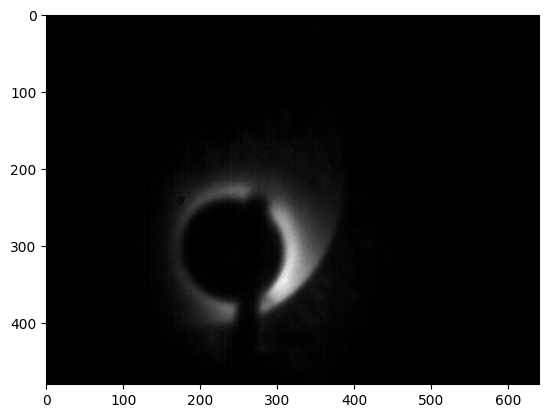

In [43]:
file_path = '/content/drive/MyDrive/test_image.npy'
data = np.load(file_path)
image = data.astype('float32')
plt.imshow(image,cmap='gray')

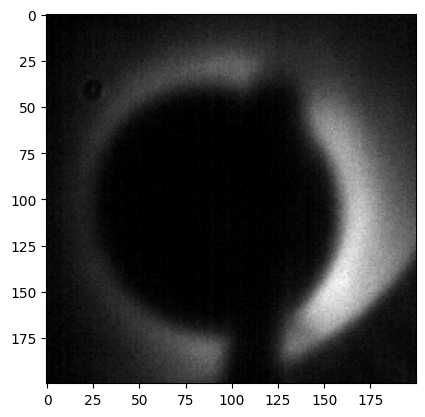

In [44]:
template = image[200:400, 150:350]
plt.imshow(template,cmap='gray')

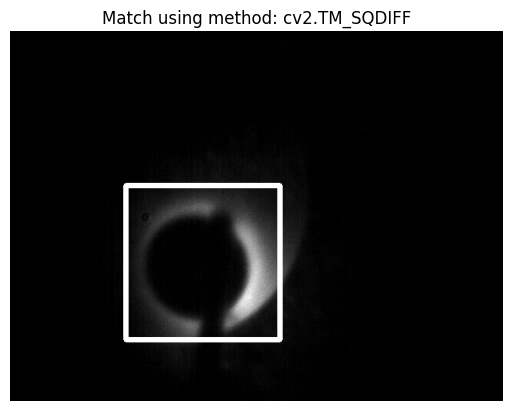

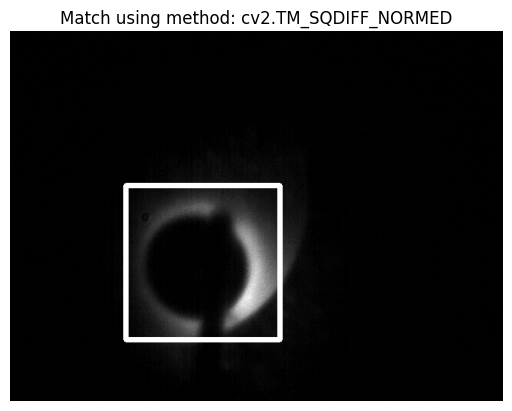

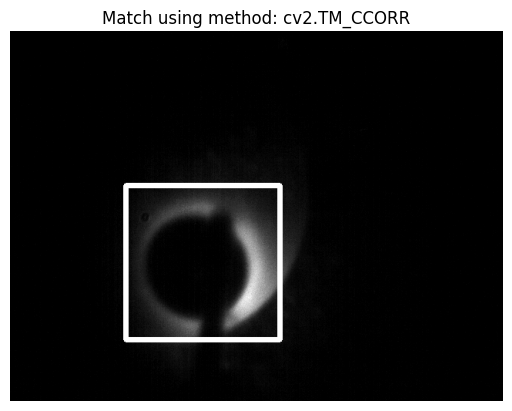

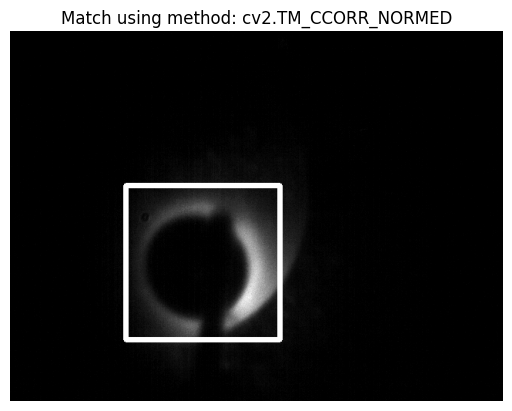

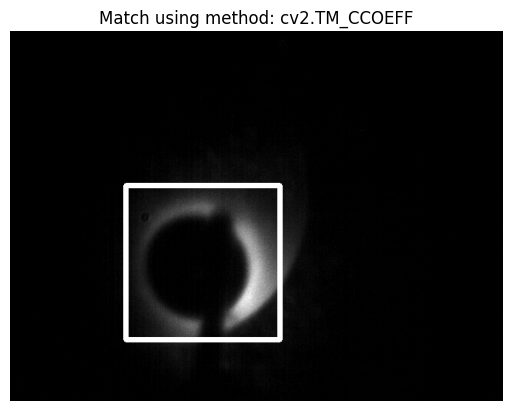

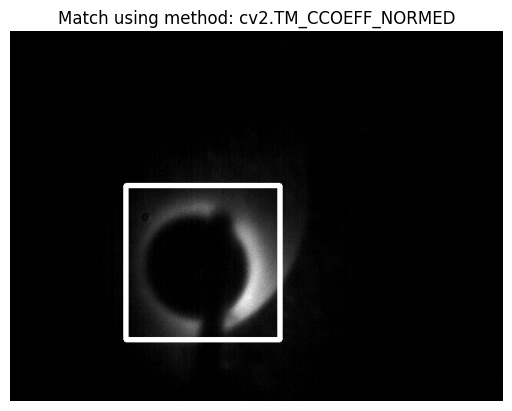

In [54]:
h, w = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
method_label = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR",
            "cv2.TM_CCORR_NORMED", "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"]

for method in methods:
    img2 = image.copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)
    cv2.rectangle(img2, location, bottom_right, 255, 5)

    # Convert BGR to RGB for matplotlib
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plotting
    plt.imshow(img2_rgb)
    plt.title('Match using method: {}'.format(method_label[method]))
    plt.axis('off')
    plt.show()


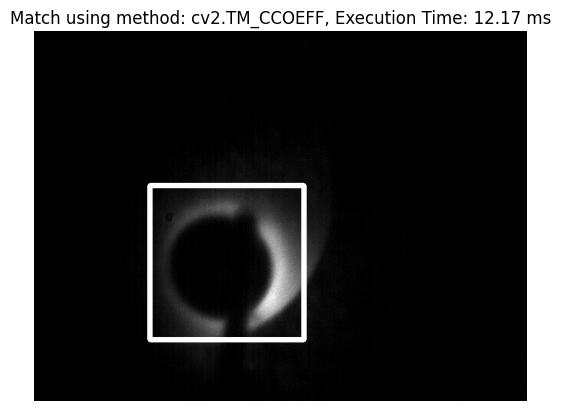

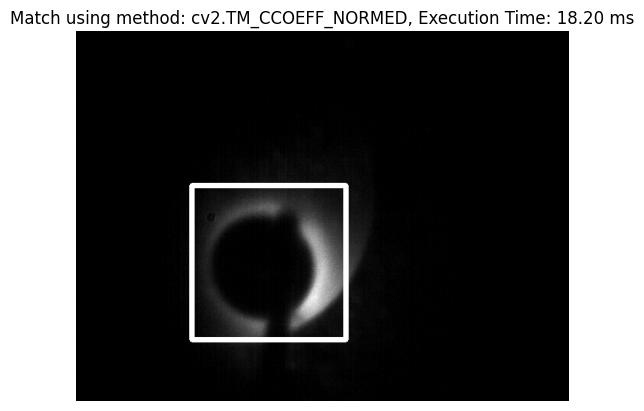

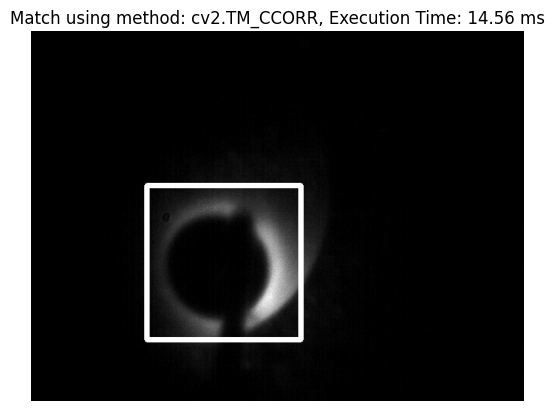

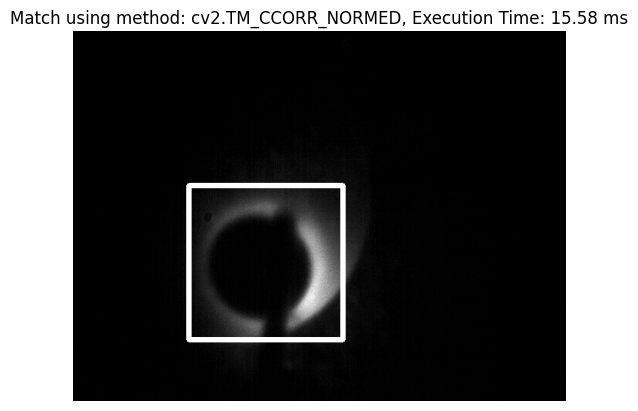

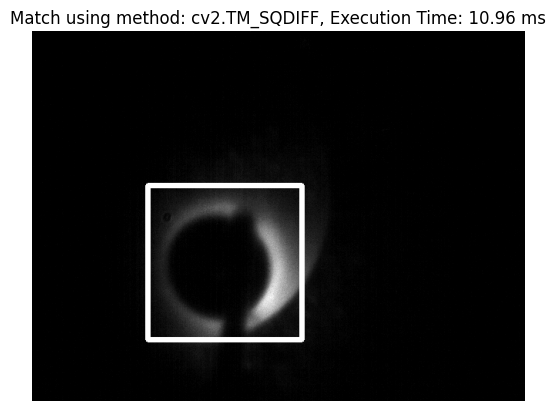

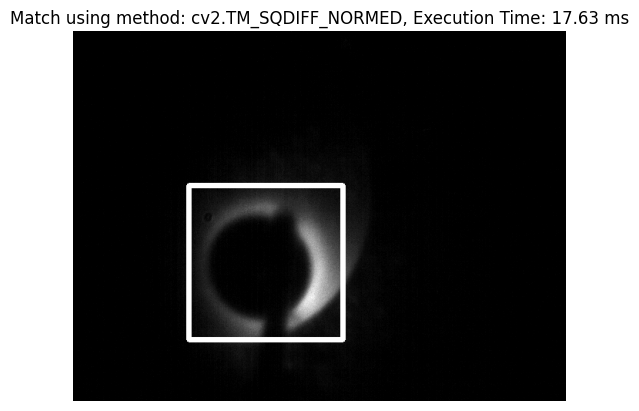

In [58]:
#Height and Width of Template
h, w = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
method_label = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR",
            "cv2.TM_CCORR_NORMED", "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"]

# Iterate over each method and measure the execution time
for method, label in zip(methods, method_label):
    img2 = image.copy()

    # Start the timer
    start_time = time.time()

    # Perform template matching
    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)
    cv2.rectangle(img2, location, bottom_right, 255, 5)

    # Convert BGR to RGB for matplotlib
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # End the timer
    end_time = time.time()
    execution_time = end_time - start_time

    # Plotting
    plt.imshow(img2_rgb)
    plt.title('Match using method: {}, Execution Time: {:.2f} ms'.format(label, execution_time*1000))
    plt.axis('off')
    plt.show()